### Loading the IMDB data.

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import preprocessing

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=300)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=300)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\alina\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\alina\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

### Using an Embedding layer and classifier on the IMDB data.


**input_dim** Size of the vocabulary, i.e. maximum integer index + 1.

**output_dim** Dimension of the dense embedding.--> Every word will be mapped onto a vector with, in this case, 8 elements. This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.

**input_length** Length of input sequences, when it is constant. This argument is required if you are going to connect 
 <Flatten> then <Dense> layers upstream (without it, the shape of the dense outputs cannot be computed).

 --> After the Embedding layer, the activations have shape (samples, 300, 8)

In [2]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = 300)) 

model.add(Flatten())

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 8)            80000     
_________________________________________________________________
flatten (Flatten)            (None, 2400)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


### Number of Parameters

**Embedding** = vocabulary size i.e. input x output = 10.000 x 8 = 80.000

**Dense** = 300 i.e. input_length x Output + 1 = 300 x 8 + 1 =2.401

*** Total params = 82.401***

In [3]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 4ms/step - loss: 0.5620 - acc: 0.7239 - val_loss: 0.3738 - val_acc: 0.8502
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2907 - acc: 0.8867 - val_loss: 0.2946 - val_acc: 0.8810
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2244 - acc: 0.9140 - val_loss: 0.2794 - val_acc: 0.8826
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1920 - acc: 0.9262 - val_loss: 0.2725 - val_acc: 0.8948
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1703 - acc: 0.9358 - val_loss: 0.2778 - val_acc: 0.8932
Epoch 6/10
625/625 [==============================] - 3s 6ms/step - loss: 0.1526 - acc: 0.9426 - val_loss: 0.2868 - val_acc: 0.8904
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1378 - acc: 0.9496 - val_loss: 0.2915 - val_acc: 0.8900
Epoch 8/10
625/625 [==============================] - 4s 6ms/step - loss: 0.

In [4]:
model.evaluate(x_train,y_train)

782/782 [==============================] - 2s 3ms/step - loss: 0.1282 - acc: 0.9570


[0.1282130926847458, 0.957040011882782]

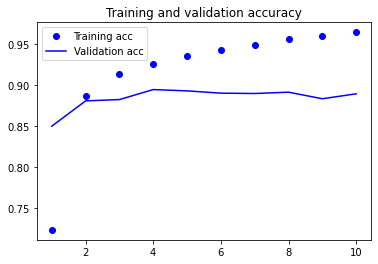

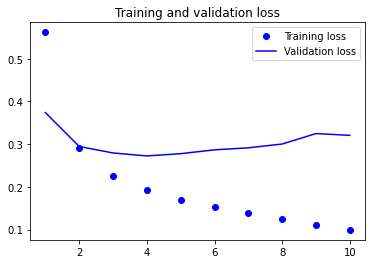

In [5]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### Using Pretrained Word Embeddings

In [7]:
import os

imdb_dir = "F:\\Study\\UMT\\S7\\Deep Learning\\Assignments\\Assignment 3\\aclImdb"
train_dir = os.path.join(imdb_dir, "train")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            f = open(os.path.join(dir_name, fname))
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)             

#### Tokenizing the data
Because pretrained word embeddings are meant to be particularily useful on problems where little data is available, I will restrict the traing data to the first 200 samples only. Let's see how well it works! 

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing. sequence import pad_sequences

training_samples = 200 # Trains on 200 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index             
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=300)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered: 
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] 
y_train = labels[:training_samples] 
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 300)
Shape of label tensor: (25000,)


### Downloading and Preprocessing the GloVe word embedding
file **glove.6B.zip** found in https://nlp.stanford.edu/projects/glove/ <br>
The entire GloVe word embedding file is loaded into memory as a dictionary of word to embedding array; embeddings_index = {}

In [10]:
glove_dir = "F:\\Study\\UMT\\S7\\Deep Learning\\Assignments\\Assignment 3\\"

embeddings_index = {}

f = open(os.path.join(glove_dir, "glove.6B.200d.txt"), encoding='utf-8') #added , encoding='utf-8'
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.


Next, an embedding matrix is needed that can be loaded into an Embedding layer. The matrix' shape must be (max_words, embedding_dim), which is has a shape of a 10000 x 200 matrix. GloVe is 200 x 400000.
#### Preparing the GloVe word embeddings matrix

In [11]:
embedding_dim = 200 # GloVe contains 200-dimensional embedding vectors for 400.000 words

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 200)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (200,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Words not found in the embedding index will all be zeros

#### Model Definition

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = 300)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 200)          2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1920032   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,920,065
Trainable params: 3,920,065
Non-trainable params: 0
_________________________________________________________________


The Embedding layer now has a single weight matrix: a 2D float matrix where each entry is the word vector meant to be associated with index.
#### Loading pretrained word embedding into the Embeddig layer
Setting this to False makes sure the Embedding layer is non-trainable when calling it. 
If you were to set trainable = True, then it will allow the optimization algorithm to modify the values of the word embeddings.
Pretrained parts shouldn't be updated during training, to avoid them forgetting what they already "know".

In [13]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

#### Training and Evaluating the Model

In [14]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"]) 
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")        

Epoch 1/10
7/7 [==============================] - 2s 275ms/step - loss: 2.7012 - acc: 0.5950 - val_loss: 1.5947 - val_acc: 0.5036
Epoch 2/10
7/7 [==============================] - 2s 223ms/step - loss: 0.8620 - acc: 0.6700 - val_loss: 0.8478 - val_acc: 0.5328
Epoch 3/10
7/7 [==============================] - 2s 219ms/step - loss: 0.2289 - acc: 0.9100 - val_loss: 0.7468 - val_acc: 0.5526
Epoch 4/10
7/7 [==============================] - 2s 219ms/step - loss: 0.0899 - acc: 1.0000 - val_loss: 0.7598 - val_acc: 0.5450
Epoch 5/10
7/7 [==============================] - 2s 216ms/step - loss: 0.0499 - acc: 1.0000 - val_loss: 0.9805 - val_acc: 0.5067
Epoch 6/10
7/7 [==============================] - 1s 204ms/step - loss: 0.0281 - acc: 1.0000 - val_loss: 0.7517 - val_acc: 0.5567
Epoch 7/10
7/7 [==============================] - 2s 216ms/step - loss: 0.0174 - acc: 1.0000 - val_loss: 0.9303 - val_acc: 0.5250
Epoch 8/10
7/7 [==============================] - 2s 233ms/step - loss: 0.0105 - acc: 1.00

In [15]:
model.evaluate(x_train,y_train)

7/7 [==============================] - 0s 9ms/step - loss: 0.0025 - acc: 1.0000


[0.0025438563898205757, 1.0]

#### Plotting the Results

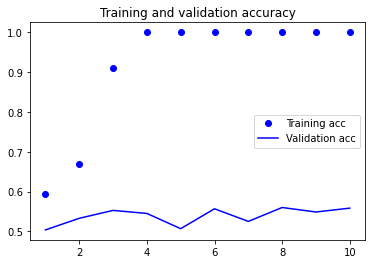

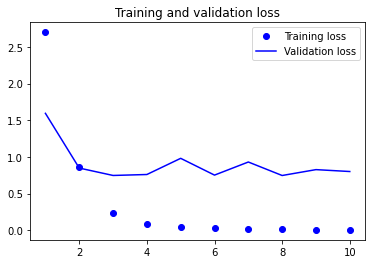

In [16]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### LSTM example
#### Preparing the IMDB data

In [17]:
from keras.datasets import imdb
from keras.preprocessing import sequence
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

batch_size = 32

print ("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = 10000)

input_train = input_train[:5000]
y_train = y_train[:5000]
input_test = input_test[:5000]
y_test = y_test[:5000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=500)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

loading data ...
5000 train sequences
5000 test sequences
Pad sequences (samples x time)
input_train shape: (5000, 500)
input_test shape: (5000,)


In [18]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 10s 303ms/step - loss: 0.6929 - acc: 0.5960 - val_loss: 0.6412 - val_acc: 0.7460
Epoch 2/10
32/32 [==============================] - 9s 277ms/step - loss: 0.5722 - acc: 0.7805 - val_loss: 0.5236 - val_acc: 0.8040
Epoch 3/10
32/32 [==============================] - 9s 290ms/step - loss: 0.4517 - acc: 0.8440 - val_loss: 0.5082 - val_acc: 0.7740
Epoch 4/10
32/32 [==============================] - 8s 259ms/step - loss: 0.3483 - acc: 0.8788 - val_loss: 0.4201 - val_acc: 0.8170
Epoch 5/10
32/32 [==============================] - 9s 282ms/step - loss: 0.2587 - acc: 0.9168 - val_loss: 0.4000 - val_acc: 0.8190
Epoch 6/10
32/32 [==============================] - 9s 273ms/step - loss: 0.2004 - acc: 0.9358 - val_loss: 0.5732 - val_acc: 0.7200
Epoch 7/10
32/32 [==============================] - 9s 274ms/step - loss: 0.1497 - acc: 0.9532 - val_loss: 0.3718 - val_acc: 0.8460
Epoch 8/10
32/32 [==============================] - 9s 276ms/step - loss: 0

In [19]:
model.evaluate(input_train,y_train)

157/157 [==============================] - 6s 41ms/step - loss: 0.2114 - acc: 0.9224


[0.21143904328346252, 0.9223999977111816]

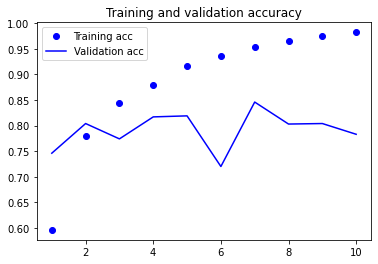

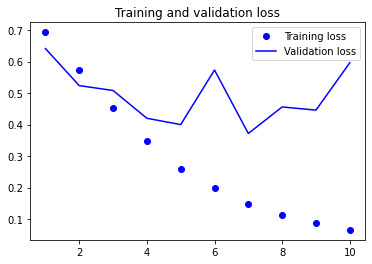

In [20]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()